# Team members: 

## Ramesh kumar
## Ravikiran Bhat
## Rubanraj Ravichandran
## Mohammad Wasil

## Exercise 1

Let's suppose we have a set of observations $x=(x_1,…,x_N)^T$, that are drawn independent and identically distributed (i.i.d) from a Gaussian distribution with unknown mean $\mu$ and variance $\sigma^2$

For this example, we are going to assume that the unknown parameters are $\mu$=2 and $\sigma^2$=25 and the number of samples N=100.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.stats import multivariate_normal
import seaborn as sns
import scipy
from scipy import stats
from scipy.optimize import minimize

#Task1:# 
Plot this (unknown) distribution together with the samples in the range [-20, 20].

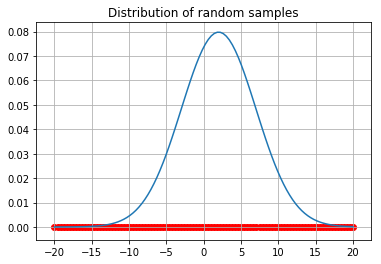

In [5]:
mu = 2.
sigma = 5.
N = 100
x = np.linspace(-20, 20, N)
fig, ax = plt.subplots(1,1)
ax.plot(x, norm.pdf(x, mu, sigma))
ax.scatter(x, np.zeros(N),color="r")
ax.grid(True)
plt.title('Distribution of random samples')
plt.show()

#Task2:#
* Implement the likelihood function in python (you can simply use the existing python implementations)
* Use a general optimization method to find the values for $\mu$ and $\sigma^2$.

In [6]:
mu = 2.
sigma = 5.
N = 100
x = np.linspace(-20, 20, N)
y = np.random.normal(mu,sigma,100)

print "actual mean : " + str(y.mean()) 
print "actual standard deviation : " + str(y.std()) 

def likelihood_function(params):
    predicted_mean = params[0]
    std = params[1]
    log_likelihood = -np.sum(norm.logpdf(y, predicted_mean, std))
    return(log_likelihood)

init_params = [1, 1]
results = minimize(likelihood_function, init_params, method='Powell')
print "predicted mean using likelyhood function: " + str(results.x[0]) 
print "predicted standard deviation using likelyhood function : " + str(results.x[1]) 

actual mean : 2.596122301769203
actual standard deviation : 4.833335849703718
predicted mean using likelyhood function: 2.5961703683890742
predicted standard deviation using likelyhood function : 4.833325914474777


#Task3:#
Given:
<br>
$\mu = \begin{bmatrix}
      0\\[0.3em]
      0\\[0.3em]
     \end{bmatrix}$
<br>
$\Sigma = \begin{bmatrix}
      0.5 & 0\\[0.3em]
      0 & 0.5\\[0.3em]
     \end{bmatrix}$
<br>
1. Visualise a Gaussian with the given parameters.
2. Visualise a marginal Gaussian.
3. Visualise a slice of Gaussian.

In [7]:
mu = np.array([0,0])
cov = np.array([[0.5, 0],[0, 0.5]])

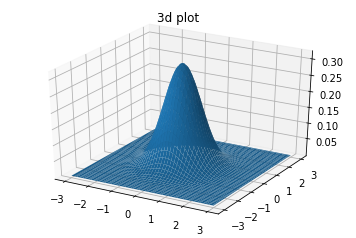

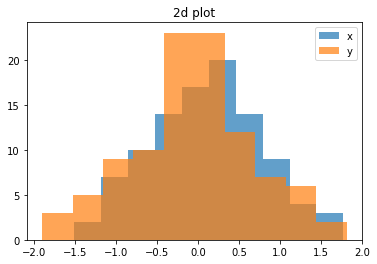

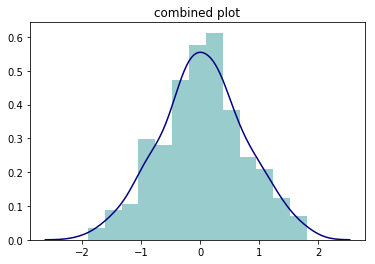

In [14]:
# 1. Visualise a Gaussian with the given parameters.
#3d plot
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.title('3d plot')
fig.show()

#2d plot
x, y = np.random.multivariate_normal(mu, cov, 100).T
plt.figure()
plt.hist(x, alpha=0.7, bins=10, label='x')
plt.hist(y, alpha=0.7, bins=10, label='y')
plt.title('2d plot')
plt.legend()

#Combine plot
combined = np.concatenate((x,y))
plt.figure()
plt.title('combined plot')
sns.distplot(combined, hist_kws={'color': 'Teal'}, kde_kws={'color' : 'Navy'})

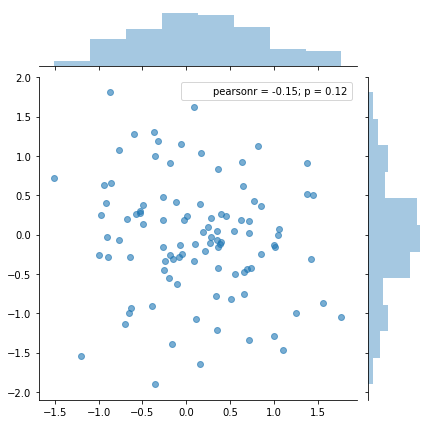

In [15]:
#2. Visualise a marginal Gaussian.
sns.jointplot(x,y, alpha=0.6)

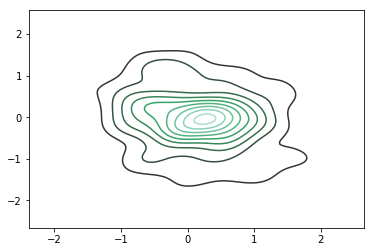

In [16]:
#3.Visualise a slice of Gaussian.
sns.kdeplot(x, y)

#Task4:#
Given:
    <br>
    Number of samples is 1000 from them 330 samples are labeled as class $A$ and 670 samples 
    are labeled as class $B$. There are 2 features $X1$ and $X2$. It is observed that  $p(A,X1)$=248,  $p(A,X2)$=82, $p(B,X1)$=168, $p(B,X2)$=502
    <br>
Compute:
<br>
Prior $p(A)$, $p(B)$
<br>
Likelihood $p(X1|A)$, $p(X1|B)$
<br>
Posterior $p(A|X1)$

In [10]:
p_A = 330.0/1000.0
p_B = 670.0/1000.0
print "Prior"
print "probability of A: " + str(p_A)
print "probability of B: " + str(p_B)

Prior
probability of A: 0.33
probability of B: 0.67


In [19]:
p_A_X1 = 248
p_B_X1 = 168
p_X1_A = p_A_X1 / p_A
p_X1_B = p_B_X1 / p_B
print "Likelihood"
print "p(X1|A): " + str(p_X1_A)
print "p(X2|A): " + str(p_X1_B)

Likelihood
p(X1|A): 751.515151515
p(X2|A): 250.746268657


In [22]:
posterior_p_A_X1 = (p_X1_A*p_A) / ((p_X1_A*p_A) + (p_X1_B*p_B))
print "Posterior"
print "p(A|X1): " + str(posterior_p_A_X1)

Posterior
p(A|X1): 0.596153846154


## Exercise 2

## Task1

Implement in Python ( you can use SciPy library) the Maximum Likelihood Estimator to estimate the parameters for example mean and variance of some data.
Your steps are:
* Create a data set: 
    - Set x-values for example: *x = np.linspace(0, 100, num=100)*, 
    - Set observed y-values using a known slope (1.4), intercept (4), and sd (3), for example       *y = 4 + 1.4x + np.random.normal(0, 3, 100)*
* Create a likelihood function which arguments is a list of initial parameters
* Test this function on various data sets 
(Hint: you can use minimize from scipy.optimize and scipy.stats to compute the negative log-likelihood)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from scipy.optimize import minimize

In [2]:
x = np.linspace(0, 100, num=100)
y = 4 + 1.4*x + np.random.normal(0, 3, 100)

print "Given slope 1.4"
print "Given intercept 4"
print "Given standard deviation 3"
print "---------------------------------"
def likelihood_function(params):
    intercept = params[0]
    slope = params[1]
    predicted_mean = intercept + slope*x
    std = params[2]
    log_likelihood = -np.sum( stats.norm.logpdf(y, predicted_mean, std) )
    return(log_likelihood)

init_params = [1, 1, 1]
results = minimize(likelihood_function, init_params, method='nelder-mead')
print "Prredicted slope using likelihood function " + str(results.x[1])
print "Prredicted intercept likelihood function  " + str(results.x[0])
print "Prredicted standard deviation likelihood function " + str(results.x[2])
print "---------------------------------"

Given slope 1.4
Given intercept 4
Given standard deviation 3
---------------------------------
Prredicted slope using likelihood function 1.39573528115
Prredicted intercept likelihood function  3.972723153
Prredicted standard deviation likelihood function 3.0008105456
---------------------------------


In [3]:
y_prediction = results.x[0] + results.x[1]*x

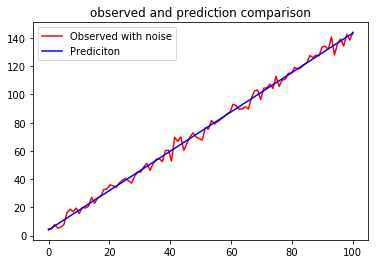

In [4]:
plt.title("observed and prediction comparison")
plt.plot(x, y, color='red', label="Observed with noise")
plt.plot(x, y_prediction, color='blue', label="Prediciton")
plt.legend()
plt.show()

## Exercise 3

GIVEN: Samples $0,1,0,0,1,0$ from a binomial distribution which has the form:
P(x=0)=(1-$\mu$), P(x=1)=$\mu$

REQUESTED: What is the maximum likelihood estimate of $\mu$ 
Hint: you can use SymPy to compute the derivities symboliclly

In [5]:
import sympy as sp
sp.init_printing("use=latex")

In [6]:
# initializing symbols
x,p,n = sp.symbols("x,p,n")

In [7]:
#likelihood function
log_likelihood = (x*sp.log(p)) + ((n-x)*sp.log(1-p))
log_likelihood

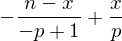

In [8]:
# liklihood diff
diff_logL = log_likelihood.diff(p)
diff_logL

In [9]:
mu = sp.solve(diff_logL,p)
mu = mu[0]
mu

In [10]:
#P(x=0)
mu.subs([(x,4),(n,6)])

In [11]:
#P(x=1)
mu.subs([(x,2),(n,6)])